<a href="https://colab.research.google.com/github/Zeeshan0123/LLM_Apps/blob/main/leads_generator_bot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
from google.colab import userdata
GROQ_API_KEY = userdata.get('GROQ_API_KEY')

In [60]:
%pip install --upgrade --quiet  langchain langchain-community langchainhub langchain_groq langchain-chroma bs4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 4.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 990.6/990.6 kB 21.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 62.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 584.3/584.3 kB 24.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 63.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.5/103.5 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 379.9/379.9 kB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.1/140.1 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 273.8/273.8 kB 17.9 MB/s e

In [67]:
from langchain_groq import ChatGroq
llm = ChatGroq(temperature=0, groq_api_key=GROQ_API_KEY, model_name="llama-3.1-8b-instant")

In [63]:
%pip install --upgrade --quiet  sentence_transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.1/227.1 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19.7 MB 10.6 MB/s eta 0:00:00


In [68]:
from langchain_community.embeddings import HuggingFaceBgeEmbeddings

model_name = "BAAI/bge-small-en"
model_kwargs = {"device": "cpu"}
encode_kwargs = {"normalize_embeddings": True}
hf = HuggingFaceBgeEmbeddings(
    model_name=model_name, model_kwargs=model_kwargs, encode_kwargs=encode_kwargs
)

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/90.8k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/684 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/133M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/366 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:

import bs4
from langchain_community.document_loaders import WebBaseLoader

# Only keep post title, headers, and content from the full HTML.
bs4_strainer = bs4.SoupStrainer(class_=("post-title", "post-header", "post-content"))
loader = WebBaseLoader(
    web_paths=("https://www.linkedin.com/company/cafevistaai/about/",),
    bs_kwargs={"parse_only": bs4_strainer},
)
docs = loader.load()
# https://www.linkedin.com/company/cafevistaai/about/

In [ ]:
len(docs[0].page_content)

0

In [ ]:
print(docs[0])

page_content='' metadata={'source': 'https://www.linkedin.com/company/cafevistaai/about/'}


In [ ]:
!pip install nest_asyncio
import nest_asyncio
nest_asyncio.apply()

In [ ]:
import asyncio
loop = asyncio.get_event_loop()

In [ ]:
# import asyncio
# from langchain_community.document_transformers import BeautifulSoupTransformer

# async def process_docs():
#     # ... (Your code to initialize loader and obtain loaded_docs) ...

#     # Gather documents from the async generator
#     loaded_docs_list = []
#     async for doc in loaded_docs:
#         loaded_docs_list.append(doc)

#     # Apply BS4 transformer
#     bs_transformer = BeautifulSoupTransformer()
#     docs_transformed = bs_transformer.transform_documents(
#         loaded_docs_list, tags_to_extract=["p", "h2", "span"]
#     )
#     return docs_transformed

# # Run the asynchronous function
# docs_transformed = asyncio.run(process_docs())

# print(docs_transformed)

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
url= "https://www.linkedin.com/company/cafevistaai/about"
# Step 1: Send a GET request to the specified URL
response = requests.get(url)

# Step 2: Parse the HTML content of the response using BeautifulSoup
soup = BeautifulSoup(response.text, 'html.parser')


In [ ]:
print(soup.contents)

[<html><head>
<script type="text/javascript">
window.onload = function() {
  // Parse the tracking code from cookies.
  var trk = "bf";
  var trkInfo = "bf";
  var cookies = document.cookie.split("; ");
  for (var i = 0; i < cookies.length; ++i) {
    if ((cookies[i].indexOf("trkCode=") == 0) && (cookies[i].length > 8)) {
      trk = cookies[i].substring(8);
    }
    else if ((cookies[i].indexOf("trkInfo=") == 0) && (cookies[i].length > 8)) {
      trkInfo = cookies[i].substring(8);
    }
  }

  if (window.location.protocol == "http:") {
    // If "sl" cookie is set, redirect to https.
    for (var i = 0; i < cookies.length; ++i) {
      if ((cookies[i].indexOf("sl=") == 0) && (cookies[i].length > 3)) {
        window.location.href = "https:" + window.location.href.substring(window.location.protocol.length);
        return;
      }
    }
  }

  // Get the new domain. For international domains such as
  // fr.linkedin.com, we convert it to www.linkedin.com
  // treat .cn similar to .co

<bound method BaseModel.parse_raw of <class 'langchain_core.documents.base.Document'>>


# **Use Selenium for webscrapping**

In [ ]:
# Set up for running selenium in Google Colab
## You don't need to run this code if you do it in Jupyter notebook, or other local Python setting
%%shell
sudo apt -y update
sudo apt install -y wget curl unzip
wget http://archive.ubuntu.com/ubuntu/pool/main/libu/libu2f-host/libu2f-udev_1.1.4-1_all.deb
dpkg -i libu2f-udev_1.1.4-1_all.deb
wget https://dl.google.com/linux/direct/google-chrome-stable_current_amd64.deb
dpkg -i google-chrome-stable_current_amd64.deb
CHROME_DRIVER_VERSION=`curl -sS chromedriver.storage.googleapis.com/LATEST_RELEASE`
wget -N https://chromedriver.storage.googleapis.com/$CHROME_DRIVER_VERSION/chromedriver_linux64.zip -P /tmp/
unzip -o /tmp/chromedriver_linux64.zip -d /tmp/
chmod +x /tmp/chromedriver
mv /tmp/chromedriver /usr/local/bin/chromedriver
pip install selenium

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Ign:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy Release [5,713 B]
Hit:6 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy Release.gpg [793 B]
Get:8 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [908 kB]
Hit:10 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Hit:13 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Get:14 https

In [ ]:
!pip install beautifulsoup4

In [ ]:
!pip install chromedriver-autoinstaller

In [ ]:
!which Xvfb

/usr/bin/Xvfb


In [ ]:
# !apt-get update  # Update package lists to ensure you have the latest information
# !apt-get install -y xvfb  # Install Xvfb
# !apt-get install  xvfb
!pip install pyvirtualdisplay

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
You might want to run 'apt --fix-broken install' to correct these.
The following packages have unmet dependencies:
 google-chrome-stable : Depends: libvulkan1 but it is not going to be installed
 xvfb : Depends: xserver-common (>= 2:21.1.4-2ubuntu1.7~22.04.11) but it is not going to be installed
        Depends: libxfont2 (>= 1:2.0.1) but it is not going to be installed
        Depends: x11-xkb-utils but it is not going to be installed
E: Unmet dependencies. Try 'apt --fix-broken install' with no packages (or specify a solution).


In [ ]:
!apt-get update
!apt-get install -y xvfb xserver-common libxfont2 x11-xkb-utils

Get:1 https://dl.google.com/linux/chrome/deb stable InRelease [1,825 B]
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:4 https://dl.google.com/linux/chrome/deb stable/main amd64 Packages [1,093 B]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Ign:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:7 https://r2u.stat.illinois.edu/ubuntu jammy Release
Hit:8 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:9 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:11 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:13 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:14 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Fetched 2,918 B in 2s (1,939 B/s)
Reading package lists... Done
W: Skipping

In [ ]:
# !apt --fix-broken install

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Correcting dependencies... Done
The following additional packages will be installed:
  libvulkan1 mesa-vulkan-drivers
The following NEW packages will be installed:
  libvulkan1 mesa-vulkan-drivers
0 upgraded, 2 newly installed, 0 to remove and 49 not upgraded.
1 not fully installed or removed.
Need to get 10.9 MB of archives.
After this operation, 51.3 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libvulkan1 amd64 1.3.204.1-2 [128 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 mesa-vulkan-drivers amd64 23.2.1-1ubuntu3.1~22.04.2 [10.7 MB]
Fetched 10.9 MB in 1s (11.0 MB/s)
Selecting previously unselected package libvulkan1:amd64.
(Reading database ... 123716 files and directories currently installed.)
Preparing to unpack .../libvulkan1_1.3.204.1-2_amd64.deb ...
Unpacking libvulkan1:amd64 (1.3.204.1-2) ...
Selecting previ

In [ ]:
# !pip install chromedriver-autoinstaller

import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')

import time
import pandas as pd
from bs4 import BeautifulSoup
from selenium import webdriver
import chromedriver_autoinstaller
from pyvirtualdisplay import Display

# Start virtual display
# display = Display(visible=0, size=(1024, 768))
display = Display(visible=0, size=(1024, 768))

# from pyvirtualdisplay.smartdisplay import SmartDisplay
# display = SmartDisplay(visible=0, size=(1024, 768), backend='xvfb',
#                        xvfb_executable='/usr/bin/Xvfb') # Update path if necessary
display.start()

# setup chrome options
chrome_options = webdriver.ChromeOptions()
# chrome_options.add_argument('--headless') # ensure GUI is off
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

# set path to chromedriver as per your configuration
chromedriver_autoinstaller.install()

# set the target URL
url = "https://www.linkedin.com/company/cafevistaai/about/"

# set up the webdriver
driver = webdriver.Chrome(options=chrome_options)

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup
import time

display = Display(visible=0, size=(1024, 768))
display.start()
# Opening linkedIn's login page
driver.get("https://linkedin.com/uas/login")

# waiting for the page to load
time.sleep(15)

# entering username
username = driver.find_element(By.ID, "username")

# In case of an error, try changing the element
# tag used here.

# Enter Your Email Address
username.send_keys("zeeshanshaan391@gmail.com")

# entering password
pword = driver.find_element(By.ID, "")
# In case of an error, try changing the element
# tag used here.

# Enter Your Password
pword.send_keys("")

# Clicking on the log in button
# Format (syntax) of writing XPath -->
# //tagname[@attribute='value']
driver.find_element(By.XPATH, "//button[@type='submit']").click()
# In case of an error, try changing the
# XPath used here.

In [27]:

from selenium import webdriver
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup
import time
from IPython.display import Image

# Creating an instance


# Logging into LinkedIn
driver.get("https://linkedin.com/uas/login")
time.sleep(5)

username = driver.find_element(By.ID, "")
time.sleep(5)
username.send_keys("zeeshanshaan391@gmail.com")  # Enter Your Email Address
time.sleep(5)

pword = driver.find_element(By.ID, "password")
pword.send_keys("")        # Enter Your Password


driver.find_element(By.XPATH, "//button[@type='submit']").click()
screenshot_path = '/content/screenshot.png'
driver.save_screenshot(screenshot_path)

# Opening Kunal's Profile
# paste the URL of Kunal's profile here
profile_url = "https://www.linkedin.com/in/kunalshah1/"

driver.get(profile_url)
# Display the screenshot
Image(screenshot_path)

NoSuchElementException: Message: no such element: Unable to locate element: {"method":"css selector","selector":"[id="username"]"}
  (Session info: chrome=127.0.6533.88); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
#0 0x5818e5ef371a <unknown>
#1 0x5818e5bc4640 <unknown>
#2 0x5818e5c13c0b <unknown>
#3 0x5818e5c13ef1 <unknown>
#4 0x5818e5c57b64 <unknown>
#5 0x5818e5c3690d <unknown>
#6 0x5818e5c5508a <unknown>
#7 0x5818e5c36683 <unknown>
#8 0x5818e5c06d71 <unknown>
#9 0x5818e5c077de <unknown>
#10 0x5818e5ebb2ab <unknown>
#11 0x5818e5ebf242 <unknown>
#12 0x5818e5ea8665 <unknown>
#13 0x5818e5ebfdd2 <unknown>
#14 0x5818e5e8d2af <unknown>
#15 0x5818e5ee2eb8 <unknown>
#16 0x5818e5ee3090 <unknown>
#17 0x5818e5ef24ec <unknown>
#18 0x790778ce5ac3 <unknown>


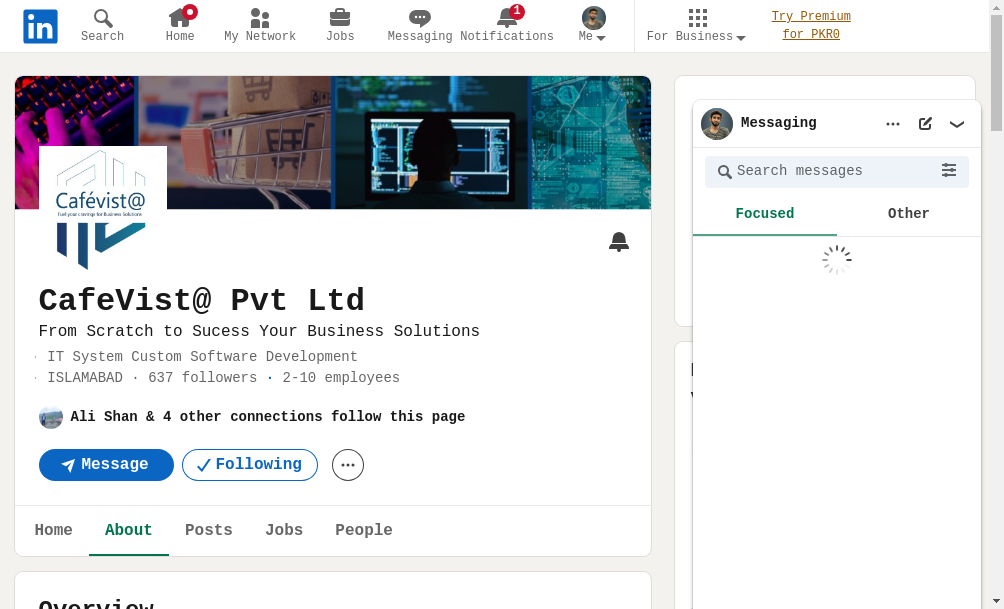

In [29]:
profile_url = "https://www.linkedin.com/company/cafevistaai/about/"

driver.get(profile_url)
screenshot_path = '/content/screenshot.png'
driver.save_screenshot(screenshot_path)
# Display the screenshot
Image(screenshot_path)

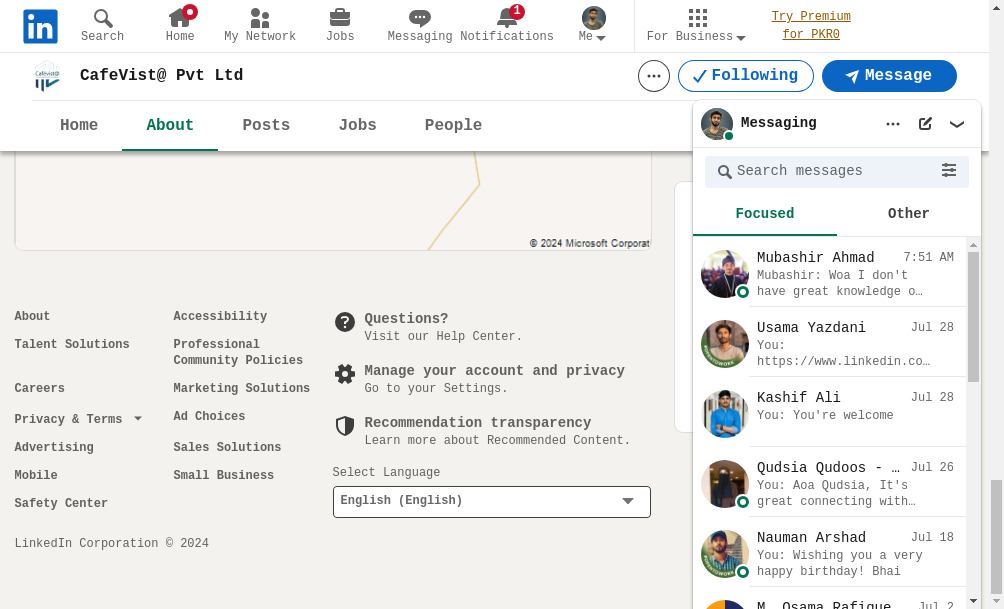

In [30]:
# Now we have to scroll to the bottom
start = time.time()

# will be used in the while loop
initialScroll = 0
finalScroll = 1000

while True:
	driver.execute_script(f"window.scrollTo({initialScroll},{finalScroll})")
	# this command scrolls the window starting from
	# the pixel value stored in the initialScroll
	# variable to the pixel value stored at the
	# finalScroll variable
	initialScroll = finalScroll
	finalScroll += 1000

	# we will stop the script for 3 seconds so that
	# the data can load
	time.sleep(3)
	# You can change it as per your needs and internet speed

	end = time.time()

	# We will scroll for 20 seconds.
	# You can change it as per your needs and internet speed
	if round(end - start) > 20:
		break

screenshot_path = '/content/screenshot.png'
driver.save_screenshot(screenshot_path)
# Display the screenshot
Image(screenshot_path)


In [31]:

src = driver.page_source

# Now using beautiful soup
soup = BeautifulSoup(src, 'lxml')

In [32]:
print(soup.contents)

[<html class="theme theme--mercado app-loader--default artdeco" lang="en"><head>
<script nonce="">!function(i,n){void 0!==i.addEventListener&&void 0!==i.hidden&&(n.liVisibilityChangeListener=function(){i.hidden&&(n.liHasWindowHidden=!0)},i.addEventListener("visibilitychange",n.liVisibilityChangeListener))}(document,window);</script>
<meta content="script-src-attr 'none'; require-trusted-types-for 'script'; trusted-types 'allow-duplicates' default jSecure highcharts dompurify" data-disposition="enforce" data-report-to="https://www.linkedin.com/security/csp?a=voyager-web&amp;m=bpr" data-sanitizer="jSecure" http-equiv="Content-Security-Policy" name="trusted-types"/>
<title>(1) CafeVist@ Pvt Ltd: About | LinkedIn</title>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta class="mercado-icons-sprite" content="https://static.licdn.com/aero-v1/sc/h/2brfqc2ezdcl00afxrykl5mid" id="artdeco-icons/static/images/sprite-asset" name="asset-url"/>
<meta content="" nam

In [51]:
intro = soup.find('div', {'class': 'org-grid__content-height-enforcer'})

print(intro)

<div class="org-grid__content-height-enforcer">
<div class="mb6" tabindex="-1">
<!-- --> <div>
<div class="ember-view" id="ember52">
<section class="artdeco-card org-page-details-module__card-spacing artdeco-card org-about-module__margin-bottom">
<h2 class="text-heading-xlarge">
          Overview
        </h2>
<p class="break-words white-space-pre-wrap t-black--light text-body-medium">Empowering your online journey, Cafevista offers an unmatched marketplace for B2B and B2C, turning visions into digital triumphs. We're your ally, whether you're an entrepreneur or an established entity, aiming for growth in the digital realm. Our expertise spans across product development, app development, AI SaaS applications, embedded systems, and comprehensive online business solutions, including ASO and SEO to enhance your online presence.

Why Cafevista?

    Expert Solutions: Leverage industry expertise in AI and app development for exceeding expectations.
    Streamlined Success: Our process simp

In [52]:
Intro_loc = intro.find("p")
print(Intro_loc)

<p class="break-words white-space-pre-wrap t-black--light text-body-medium">Empowering your online journey, Cafevista offers an unmatched marketplace for B2B and B2C, turning visions into digital triumphs. We're your ally, whether you're an entrepreneur or an established entity, aiming for growth in the digital realm. Our expertise spans across product development, app development, AI SaaS applications, embedded systems, and comprehensive online business solutions, including ASO and SEO to enhance your online presence.

Why Cafevista?

    Expert Solutions: Leverage industry expertise in AI and app development for exceeding expectations.
    Streamlined Success: Our process simplifies your online venture, ensuring a seamless experience from concept to execution.
    Global Expansion: Support for your business's growth on an international scale through strategic online visibility.
    End-to-End Assistance: Focus on your core business while we manage your online transformation.

Our Off

In [53]:
Intro = Intro_loc.get_text()

In [54]:
print(Intro)

Empowering your online journey, Cafevista offers an unmatched marketplace for B2B and B2C, turning visions into digital triumphs. We're your ally, whether you're an entrepreneur or an established entity, aiming for growth in the digital realm. Our expertise spans across product development, app development, AI SaaS applications, embedded systems, and comprehensive online business solutions, including ASO and SEO to enhance your online presence.

Why Cafevista?

    Expert Solutions: Leverage industry expertise in AI and app development for exceeding expectations.
    Streamlined Success: Our process simplifies your online venture, ensuring a seamless experience from concept to execution.
    Global Expansion: Support for your business's growth on an international scale through strategic online visibility.
    End-to-End Assistance: Focus on your core business while we manage your online transformation.

Our Offerings:

    Innovative R&D: Cutting-edge research and development for bespo

In [55]:
second_loc = intro.find('dl', {'class': 'overflow-hidden'})
print(second_loc)


<dl class="overflow-hidden">
<dt class="mb1">
<h3 class="text-heading-medium">
                Website
              </h3>
</dt>
<dd class="mb4 t-black--light text-body-medium">
<a class="link-without-visited-state ember-view" href="https://cafevistaai.com" id="ember53" rel="noopener noreferrer" tabindex="0" target="_blank">
<span class="link-without-visited-state" dir="ltr">
                  https://cafevistaai.com
                </span>
</a>
</dd>
<dt class="mb1 text-heading-medium">
<h3 class="text-heading-medium">
                Phone
              </h3>
</dt>
<dd class="mb4 t-black--light text-body-medium">
<a class="link-without-visited-state ember-view" href="tel:+923175948528" id="ember54" rel="noopener noreferrer" tabindex="0" target="_blank">
<span aria-hidden="true" class="link-without-visited-state" dir="ltr">
                  +923175948528
                </span>
<span class="visually-hidden">
                  Phone number is +923175948528
                </span>
</a>

In [58]:
# Helper function to find dt by text and get the corresponding dd
def extract_data(second_loc, heading_text):
    for dt in second_loc.find_all('dt'):
        if dt.find('h3').get_text(strip=True) == heading_text:
            dd = dt.find_next_sibling('dd')
            if dd.find('a'):
                return dd.find('a').get_text(strip=True)
            return dd.get_text(strip=True)
    return None

# Extracting data
website = extract_data(second_loc, 'Website')
phone = extract_data(second_loc, 'Phone')
industry = extract_data(second_loc, 'Industry')
company_size = extract_data(second_loc, 'Company size')

# For company size, we need to get the additional information about associated members
associated_members = second_loc.find_all('dd')[4].get_text(strip=True)

founded = extract_data(second_loc, 'Founded')
specialties = extract_data(second_loc, 'Specialties')

# Combine company size and associated members
company_size_text = f"{company_size} {associated_members}"

# Print results
print(f"Website: {website}")
print(f"Phone: {phone}")
print(f"Industry: {industry}")
print(f"Company size: {company_size_text}")
print(f"Founded: {founded}")
print(f"Specialties: {specialties}")

Website: https://cafevistaai.com
Phone: +923175948528Phone number is +923175948528
Industry: IT System Custom Software Development
Company size: 2-10 employees 10 associated membersLinkedIn members who’ve listed CafeVist@ Pvt Ltd as their current workplace on their profile.
Founded: 2023
Specialties: Brand Development, AI Automated Business, Product Development, Digital Transformation, Business Automation, Custom Software Solutions, Customer Experience Design, Mobile App Development, Web Development & Design, E-commerce Optimization, Data Analytics & Insights, Market Expansion Strategies, SaaS Product Launches, Artificial Intelligence (AI) Solutions, Cross-Platform Development, E-learning and Online Training Platforms, International Market Entry, B2C Customer Engagement Tactics, DropShipping, E-commerce Wholesale, and Instagram dropshipping


In [59]:

data = f"""Introduction: {Intro}
Website: {website}
Phone: {phone}
Industry: {industry}
Company size: {company_size_text}
Founded: {founded}
Specialties: {specialties}
"""

# Save to a .txt file
with open("company_info.txt", "w") as file:
    file.write(data)


# Now lets start the chatbot part

In [83]:
from langchain.text_splitter import MarkdownTextSplitter
from langchain.docstore.document import Document

text_splitter = MarkdownTextSplitter(chunk_size=400, chunk_overlap=50)
chunks = text_splitter.split_text(data)

doc_chunks = []
for i, chunk in enumerate(chunks):
  doc = Document(page_content=chunk)
  doc_chunks.append(doc)


In [84]:
print(doc_chunks[0])

page_content='Introduction: Empowering your online journey, Cafevista offers an unmatched marketplace for B2B and B2C, turning visions into digital triumphs. We're your ally, whether you're an entrepreneur or an established entity, aiming for growth in the digital realm. Our expertise spans across product development, app development, AI SaaS applications, embedded systems, and comprehensive online business'


In [85]:
from langchain_chroma import Chroma
vectorstore = Chroma.from_documents(documents=doc_chunks, embedding=hf)

In [90]:
from langchain import hub
from langchain_core.runnables import RunnablePassthrough
from langchain_core.output_parsers import StrOutputParser

prompt = hub.pull("rlm/rag-prompt")
retriever = vectorstore.as_retriever(k=3)


def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs)


rag_chain = (
    {"context": retriever | format_docs, "question": RunnablePassthrough()}
    | prompt
    | llm
    | StrOutputParser()
)


In [91]:
rag_chain.invoke("What is the company size?")

'CafeVist@ Pvt Ltd has 2-10 employees and 10 associated members. The company was founded in 2023 and operates in the IT System Custom Software Development industry. The company size is relatively small, with a limited number of employees.'

In [95]:
rag_chain.invoke("tell me the Cafevista's business strategy")

"Cafevista's business strategy is to empower online journeys by offering a comprehensive marketplace for B2B and B2C, providing expertise in product development, app development, AI SaaS applications, and online business solutions. They aim to be a partner for growth in the digital realm, offering everything from SEO optimization to advanced AI solutions under one roof. Their goal is to help clients redefine digital excellence and make their mark in the online world."

In [96]:
rag_chain.invoke("tell me the services this company provides")

'Cafevista provides a range of services including AI solutions, cross-platform development, e-learning platforms, international market entry, B2C customer engagement tactics, dropshipping, e-commerce wholesale, and Instagram dropshipping. They also offer SEO optimization and advanced AI solutions. Their services are designed to help businesses manage their online transformation and achieve digital success.'